In [1]:
r"""
This tutorial is focused on the magnon-magnon mechanism of magnon damping

Magnon-magnon interaction is a slow calculations, therefore we use 
toy model and a small K-grid to make the
calculation times reasonable for a tutorial

The progress of the calculation can be viewed in the Log-file
"""

import numpy as np
import matplotlib.pyplot as plt

import os
import sys
script_dir = os.path.dirname(os.path.abspath('__file__'))
project_root = os.path.abspath(os.path.join(script_dir, '..','Src'))  # adjust '..' depending where you are
sys.path.insert(0, project_root)

import MagnoFallas as mfal

In [2]:
#####   First we define the parameters of the toy models
J = 3.0     ## Heisenberg exhange, meV
kappa = 0.01    ## leads to kappa*J = 0.03 meV
a = 3.0    ### Lattice constant, angstr
c = 15   ### sound velocity
S = 3/2  ## spin of the magnetic atoms (integer of half-integer)

In [3]:
### Here we initialize the toy model
Model = mfal.ToyModelFM(J, kappa, a, c=c, S=S, dim=2)

In [4]:
#### we define the parameters of the calculations
Ng = 16   ### K-grid size in each direction
rm = 0.15  ### shows that only 0.25 of the K-space in all the direction
           ### would be covered by the k-grid
           ### this is usefull to avoid costly calculation for large magnon k-vectors, which have
           ### a minor effect on the damping

In [5]:
## We creathe the mfal.damping4M object controlling the calculations
dampMC = mfal.damping4M(Model.SH, Ng, Ng, rKxM = rm, rKyM = rm, dim=2,  
        roles = mfal.roles['MagnonMC'],  Name = 'damping_model_4M_MC')
#
# the parameters here are:
# Model.SH - spin Hamiltonian of the problem
# Ng, Ng - the size of Kgrid (for 3D the "third" size of K-grid for z-direction should also be set)
# dim=2 - shows that we study a 2D material
# roles = mfal.roles['MagnonMC'] --- shows that we study magnon-conserving processes (the only processes possible in the toy model)
# Name -- name of the process. Used for the Log and saving files

In [6]:
dampMC.GenScatSet()
### Here we identify the "scattering events"

dampMC.InitScater()
### Here calculate the "real" momenta of the participating magnons, integrals of delta-functions and matrix elements

## both the processes must be finished before the relaxation can be calculated
## nevertheless, the scatterings can be saved before the initalization to divided the process into the parts

In [7]:
dampMC.saveScatterings()
#The scattering events can be loaded later with dampMC.loadScatterings()

In [8]:
## here we select temperatures for the calculation of damping and do the calculation itself
## with the scattering events initialized, this part is usually fast
tt = np.linspace(0.1, 50, 100)
alps = np.array([dampMC.alpha(t) for t in tt])

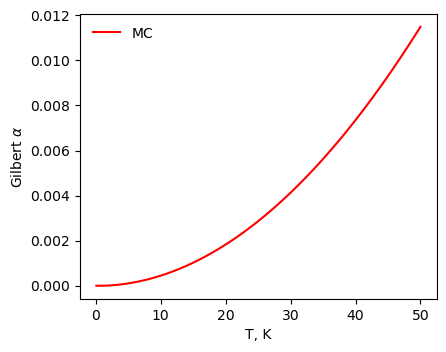

In [9]:
# Here we plot the temperature dependence of the damping
plt.figure(figsize=(4.6,3.7))
plt.plot(tt,alps,'r-', label='MC')

plt.legend(frameon=False)

plt.xlabel('T, K')
plt.ylabel(r'Gilbert $\alpha$')
plt.savefig('Model-magnon-damping.png', bbox_inches='tight')

plt.show()

In [10]:
### to asess the parameters of the calculations it is useful
### to calculate the map of the contributions of different
### wavevectros k_1 to the damping

T1 = 50
axis, Contr =  dampMC.alphaContrib(T1)

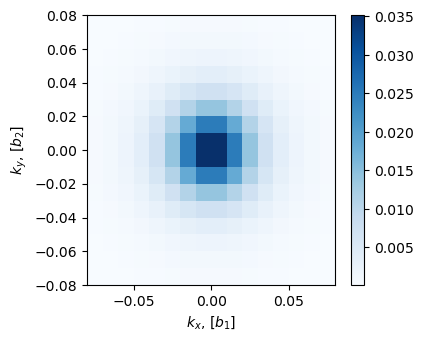

In [11]:
### Here we calculate the total contributions of all the branches and show the result
plt.figure(figsize=(4.0,3.5))
plt.pcolormesh(axis[0], axis[1], np.transpose(Contr), cmap='Blues' )
plt.xlabel(r'$k_x$, $[b_1]$')
plt.ylabel(r'$k_y$, $[b_2]$')
plt.colorbar()

plt.savefig('Model-magnon-contribution-MC.png', bbox_inches='tight')

plt.show()


In [12]:
### A criteria for the reasonable parameters og the calculations are:
#
# 1) the contribution from the highes calculated k-vector is already small
#  The map "near its borders" is white
#
# 2) the strong contribution to the damping comes from many pixels